## TITLE

Subheading

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as ss
%matplotlib inline
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', None)

The plot in question is the one shown below. It shows total cases/deaths per million and the HDI of the countries. It has a logarithmic y axis and a linear x axis and shows that has HDI increases, the cases and deaths per million also increases. To me, this is a crazy claim as I would initially think that more developed countries would have few cases and deaths due to better healthcare infrastructure and access to tests and vaccines.

In [2]:
df = pd.read_csv("owid-covid-data.csv")

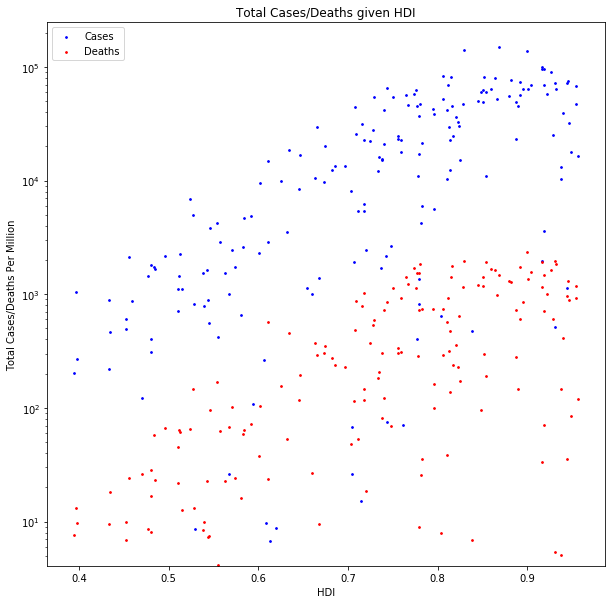

In [3]:
df2 = df[["total_tests","iso_code","location","date","total_cases_per_million","total_cases",
          "total_deaths","total_deaths_per_million","human_development_index","population"]]
dfHDI = df2.loc[df['date'] == "2021-03-23"]
dfHDI = dfHDI.drop([798,4023,23782,24208,50944,52164,64162,75743])
dfHDI = dfHDI.reset_index()
x = dfHDI['human_development_index']
y1 = dfHDI['total_cases_per_million']
y2 = dfHDI['total_deaths_per_million']
fig1 = plt.figure(figsize = (10, 10))
ax1 = fig1.add_subplot()
plt.scatter(x, y1, s = 3, alpha=1, c="b")
plt.scatter(x, y2, s = 3, alpha=1, c="r")
ax1.set_yscale('log')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Total Cases/Deaths Per Million")
plt.xlabel("HDI")
plt.title("Total Cases/Deaths given HDI", fontsize = 12)
plt.legend((("Cases"), ("Deaths")), loc = "upper left", fontsize = 10)
plt.show();

The graph does show an upwards trend for both <font color=blue>cases</font> and <font color=red>deaths</font>, although not a very tight correlation, with a few anomalous results that show the same levels of cases and deaths at higher HDIs than at lower ones. The correlation coefficients for cases and deaths are <font color=blue>0.74953</font> and <font color=red>0.72743</font> respectively which, in my opinion, are high enough to discount the anomalies and investigate why more developed countries were seemingly hit harder by the COVID-19 pandemic.
To explore the reasons behind this plot, I am going to look into the following:
- The testing data
- The obesity rate in the countries
- The mortality rate in each country

#### Calculating logs

In [4]:
print("Natural log of cases: ",np.log(dfHDI['total_cases_per_million']).corr(dfHDI['total_cases_per_million']))
print("Natural log of deaths:",np.log(dfHDI['total_deaths_per_million']).corr(dfHDI['total_cases_per_million']))

Natural log of cases:  0.7495267974307972
Natural log of deaths: 0.7274268041525757


### Testing

I think the higher number of cases can be attributed to the fact that more developed countries had access to more tests, and could better implement a widespread testing procedure, and therefore would get more official positive test results on record. To explore this, I used the ‘total tests’ column from a week before the data from the initial plot (in order to make my sample size as large as possible due to delayed reporting) and then divided this by the nation’s population. This gave me a rough estimate of the proportion of the population that had taken a test (rough because some people would have taken many tests whilst some will have taken none) and then I used this to compare testing between nations. 

In [5]:
dfTEST = df.loc[df['date'] == "2021-03-16"]
dfTEST = dfTEST[["total_tests","total_tests_per_thousand","new_tests","location","date","human_development_index","population"]]
dfTEST['pop% Test'] = dfTEST['total_tests']*100/dfTEST['population']
dfTEST = dfTEST.dropna()

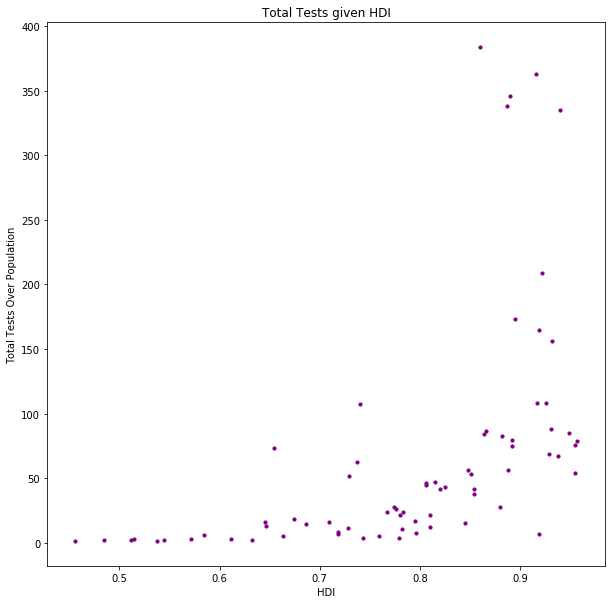

In [6]:
x = dfTEST['human_development_index']
y = dfTEST['pop% Test']
fig4 = plt.figure(figsize = (10, 10))
ax4 = fig4.add_subplot()
plt.scatter(x, y, s = 10, alpha = 1, c = "purple", label = "Tests")
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Total Tests Over Population")
plt.xlabel("HDI")
plt.title("Total Tests given HDI", fontsize = 12)
plt.show();

The graph shows that as the Human Development Index for a country increases, so does their percentage of tests over the population. Some nations were able to record enough tests for four times their population whilst others couldn’t hit 10%. Whilst this is not necessarily a causal relationship, I think it’s fair to say that HDI is a good indicator of whether or not a country conducted a lot of tests because we had a large range of HDI’s (0.45 – 0.95) and only after 0.8 do we see a rise in the number of tests which suggests to me that only nations who are highly developed had a large testing capacity. This could explain why we saw the upwards trend in the original graph as the more tests a country does, the more positive results they will get, and so developed countries who test a lot will have more positive results than less developed ones.

### Death Statistics

In order to understand the deaths trend shown in the original graph, I created some new statistics from the data so that I could grasp the numbers better. I calculated the percentage of cases that resulted in a death, along with the percentage of the population that had a positive case or a confirmed death. I will use these to produce more plots and to try and explain the correlation in the first plot. 

In [19]:
dfHDI['pop%_Cases'] = dfHDI['total_cases']*100/dfHDI['population']
dfHDI['pop%_Deaths'] = dfHDI['total_deaths']*100/dfHDI['population']
dfHDI['%_Deaths'] = dfHDI['total_deaths']*100/dfHDI['total_cases']
dfHDI['Perc_Infected'] = dfHDI['total_cases']*100/dfHDI['population']
dfHDI[['location','pop%_Cases','pop%_Deaths','%_Deaths','Perc_Infected']]

,location,pop%_Cases,pop%_Deaths,%_Deaths,Perc_Infected
0,Afghanistan,0.144309,0.006335,4.389697,0.144309
1,Albania,4.234033,0.074918,1.769432,4.234033
2,Algeria,0.265328,0.006992,2.635175,0.265328
3,Andorra,15.001618,0.146250,0.974894,15.001618
4,Angola,0.066250,0.001613,2.434096,0.066250
5,Antigua and Barbuda,1.102851,0.028592,2.592593,1.102851
6,Argentina,5.003956,0.121301,2.424105,5.003956
7,Armenia,6.243854,0.114200,1.828991,6.243854
8,Australia,0.114593,0.003565,3.110776,0.114593
9,Austria,5.773450,0.101272,1.754106,5.773450


Now that I have these statistics, I can use them to explore the deaths in a more indepth manor and hopefully come to a conclusion as to why deaths per million were higher for more developed nations. 

### BMI


The idea of looking into BMI data stemmed from the claims that obese people were more at risk of death from COVID-19. The [Gov Website]( https://www.gov.uk) makes this claim along with other sources and so I collected data from [NCD RisC]( https://ncdrisc.org/data-downloads-adiposity.html). I then processed it so that I could merge it with my existing data and produce a graph to show if deaths were more common in obese nations and whether or not these nations were developed or not. Unfortunately, the data set had different values for men and women and so I had to choose which one to use: ultimately going with the male data as more men have died from COVID-19 than women [(as seen in this article)]( https://www.nature.com/articles/s41467-020-19741-6). 

In [20]:
BMI = pd.read_csv("NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv", encoding= 'unicode_escape')
BMI = BMI.loc[BMI['Year'] == 2016]
BMIMen = BMI.loc[BMI['Sex'] == 'Men']
BMIMen = BMIMen.reset_index()
BMIMen = BMIMen[["ISO", "Mean BMI", "Prevalence of BMI>=30 kg/m² (obesity)", "Prevalence of BMI>=35 kg/m² (severe obesity)"]]

In [21]:
mergedDF = dfHDI
mergedDF = mergedDF.merge(BMIMen, left_on = "iso_code", right_on = 'ISO')

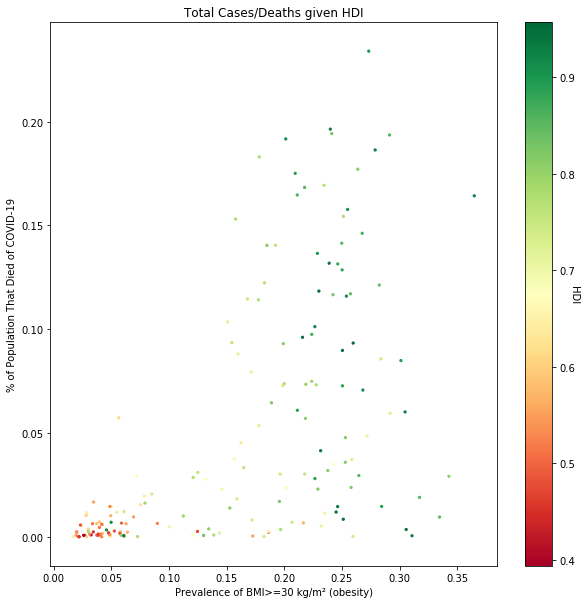

In [28]:
x = mergedDF['Prevalence of BMI>=30 kg/m² (obesity)']
y = mergedDF['pop%_Deaths']
fig3 = plt.figure(figsize = (10, 10))
ax3 = fig3.add_subplot()
plt.scatter(x, y, s = 5, alpha = 1, c = mergedDF.human_development_index, cmap = 'RdYlGn')
cbar = plt.colorbar()
cbar.ax.set_ylabel('HDI', rotation = 270)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("% of Population That Died of COVID-19")
plt.xlabel("Prevalence of BMI>=30 kg/m² (obesity)")
plt.title("Total Cases/Deaths given HDI", fontsize = 12)
plt.show();

The graph does clearly show that as the prevalence of obesity rises, so does the percentage of the population that died. The plot also shows that as the HDI increases the prevalence of obesity does too. This is the link we need to account for the trend, seen in the original graph, that more developed countries have higher deaths per million than less developed ones. As their HDI rises, they are able to consume more, leading to a more obese population which in turn means a higher mortality rate from COVID-19.

### Final Thoughts

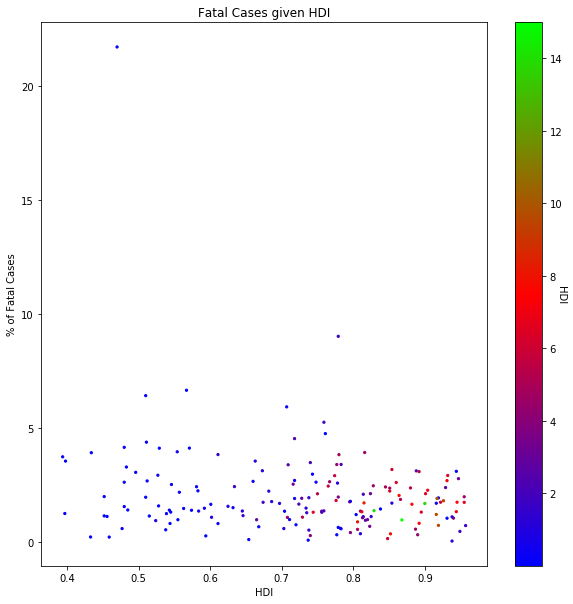

In [30]:
x = mergedDF['human_development_index']
y2 = mergedDF['%_Deaths']
y1 = mergedDF['Perc_Infected']
fig5 = plt.figure(figsize = (10, 10))
ax5 = fig5.add_subplot()
plt.scatter(x, y2, s = 5, alpha = 1, c = mergedDF.Perc_Infected, cmap = 'brg')
cbar = plt.colorbar()
cbar.ax.set_ylabel('HDI', rotation = 270)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("% of Fatal Cases")
plt.xlabel("HDI")
plt.title("Fatal Cases given HDI", fontsize = 12)
plt.show();